In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install ultralytics --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
!cat /content/dataset_yolo/data.yaml



train: /content/dataset_yolo/train/images
val: /content/dataset_yolo/valid/images

nc: 20
names: ['Hello', 'Namaste', 'Yes', 'Thank You', 'Welcome', 'Sorry', 'Help', 'Stop', 'Bad', 'Water', 'Eat', 'I', 'You', 'Man', 'Woman', 'Indian', 'Friend', 'Difficult', 'Teacher', 'Bye']


In [ ]:
from ultralytics import YOLO

# Load YOLOv8 small model (good balance between speed & accuracy)
model = YOLO('yolov8s.pt')

# Train the model
model.train(
    data='/content/dataset_yolo/data.yaml',   # Your dataset.yaml file
    epochs=50,                                # Number of epochs (reduce to 30 if urgent)
    imgsz=640,                                # Image size
    batch=16,                                 # Batch size (increase to 32 if Colab RAM allows)
    patience=10,                              # Early stopping patience
    optimizer='SGD',                          # 'Adam' or 'SGD' — SGD is faster, more stable for small datasets
    lr0=0.001,                                # Initial learning rate
    weight_decay=0.0005,                      # Regularization
    momentum=0.9,                             # SGD momentum
    device=0                                  # Use GPU
)


Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset_yolo/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.9, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, pretrained=T

100%|██████████| 755k/755k [00:00<00:00, 23.0MB/s]

Overriding model.yaml nc=80 with nc=20

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

 22        [15, 18, 21]  1   2123788  ultralytics.nn.modules.head.Detect           [20, [128, 256, 512]]         
Model summary: 129 layers, 11,143,340 parameters, 11,143,324 gradients, 28.7 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 101MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 804.8±225.7 MB/s, size: 69.0 KB)


train: Scanning /content/dataset_yolo/train/labels... 4800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4800/4800 [00:01<00:00, 2463.50it/s]

train: New cache created: /content/dataset_yolo/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1270.0±827.0 MB/s, size: 68.2 KB)


val: Scanning /content/dataset_yolo/valid/labels... 1200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1200/1200 [00:01<00:00, 1092.99it/s]

val: New cache created: /content/dataset_yolo/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.72G     0.3804      3.381      1.128         42        640: 100%|██████████| 300/300 [01:36<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:11<00:00,  3.20it/s]


                   all       1200       1200      0.382      0.537      0.459      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.32G    0.09521      1.822     0.9168         50        640: 100%|██████████| 300/300 [01:32<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.64it/s]


                   all       1200       1200      0.877      0.855       0.94      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.34G     0.0788      1.159     0.8972         52        640: 100%|██████████| 300/300 [01:32<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.01it/s]

                   all       1200       1200      0.968      0.942      0.986      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.37G        inf     0.8284     0.8883         56        640: 100%|██████████| 300/300 [01:32<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.59it/s]

                   all       1200       1200      0.987      0.987      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.39G    0.06869      0.661      0.883         52        640: 100%|██████████| 300/300 [01:31<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.66it/s]

                   all       1200       1200       0.99      0.992      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.42G    0.06601     0.5593     0.8816         54        640: 100%|██████████| 300/300 [01:31<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.65it/s]

                   all       1200       1200      0.996      0.997      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.44G    0.06367     0.4925     0.8803         49        640: 100%|██████████| 300/300 [01:31<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  3.81it/s]

                   all       1200       1200      0.998      0.998      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.46G    0.06041     0.4535     0.8776         55        640: 100%|██████████| 300/300 [01:32<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.03it/s]

                   all       1200       1200      0.998      0.996      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.49G    0.05831     0.4168     0.8786         51        640: 100%|██████████| 300/300 [01:31<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.66it/s]

                   all       1200       1200      0.997      0.997      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.51G    0.05652     0.3848     0.8776         55        640: 100%|██████████| 300/300 [01:31<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.67it/s]

                   all       1200       1200      0.998      0.999      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.54G    0.05562     0.3679     0.8781         51        640: 100%|██████████| 300/300 [01:31<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.66it/s]

                   all       1200       1200      0.998      0.999      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.56G    0.05283     0.3396     0.8761         53        640: 100%|██████████| 300/300 [01:31<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.80it/s]

                   all       1200       1200      0.998      0.998      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.59G        inf     0.3283     0.8741         46        640: 100%|██████████| 300/300 [01:32<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  3.95it/s]

                   all       1200       1200      0.998      0.999      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.61G    0.05048     0.3193     0.8797         52        640: 100%|██████████| 300/300 [01:32<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.70it/s]

                   all       1200       1200      0.999      0.999      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.64G    0.04952     0.2942      0.875         52        640: 100%|██████████| 300/300 [01:31<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.69it/s]

                   all       1200       1200      0.998          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.66G    0.04826     0.2859     0.8724         49        640: 100%|██████████| 300/300 [01:31<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.72it/s]

                   all       1200       1200      0.999          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.68G    0.04776     0.2775     0.8738         45        640: 100%|██████████| 300/300 [01:31<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.71it/s]

                   all       1200       1200      0.998          1      0.995      0.995
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 7, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



17 epochs completed in 0.485 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 22.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,133,324 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:11<00:00,  3.20it/s]


                   all       1200       1200      0.998          1      0.995      0.995
                 Hello         60         60      0.998          1      0.995      0.995
               Namaste         60         60          1          1      0.995      0.995
                   Yes         60         60      0.998          1      0.995      0.995
             Thank You         60         60      0.998          1      0.995      0.995
               Welcome         60         60      0.998          1      0.995      0.995
                 Sorry         60         60      0.998          1      0.995      0.995
                  Help         60         60      0.998          1      0.995      0.995
                  Stop         60         60      0.997          1      0.995      0.995
                   Bad         60         60      0.998          1      0.995      0.995
                 Water         60         60      0.998          1      0.995      0.995
                   Ea

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cb926542ed0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043

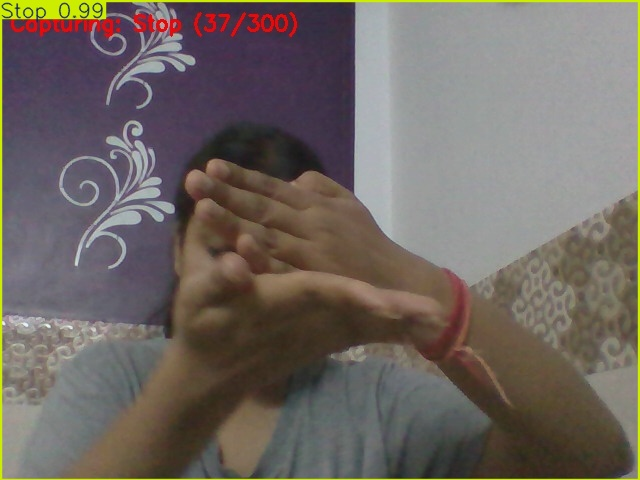

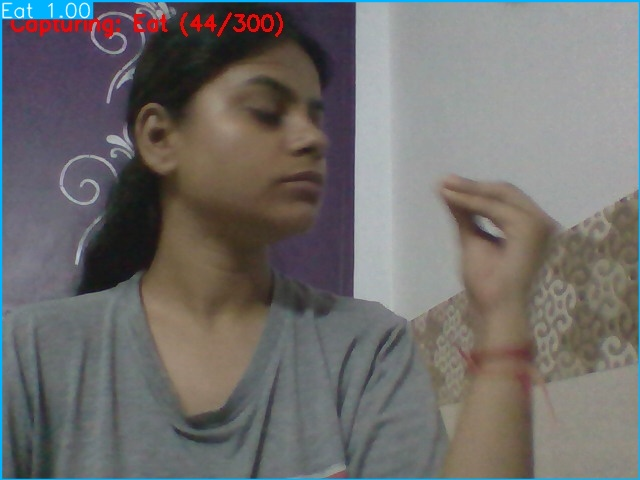

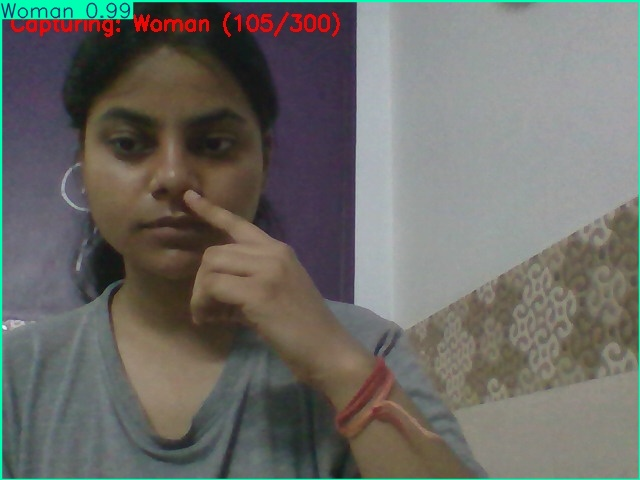

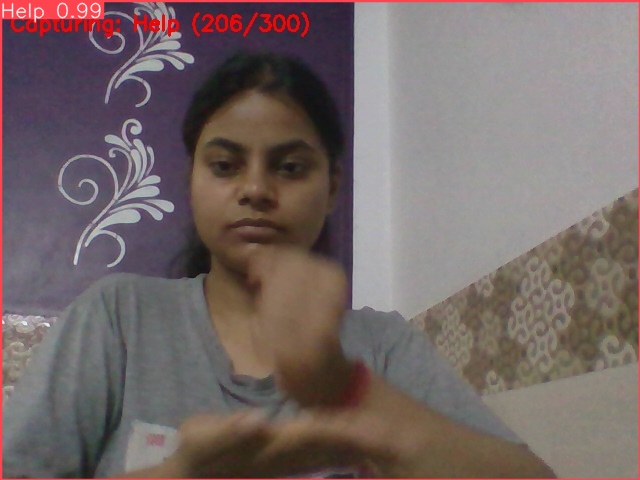

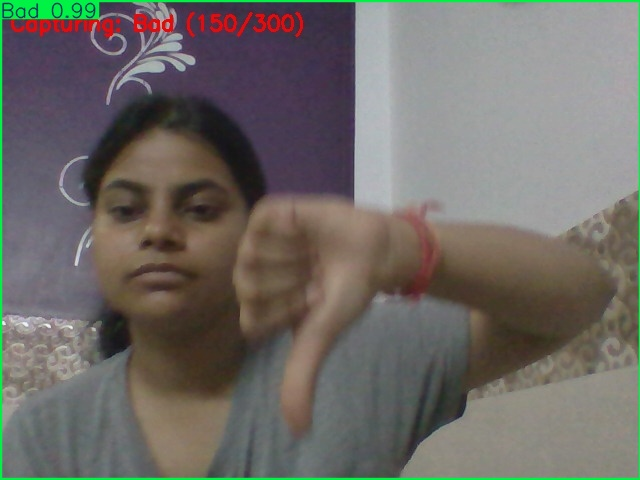

In [ ]:
import glob
from IPython.display import Image, display

# Display first 5 result images
for img_path in glob.glob('/content/runs/detect/predict/*.jpg')[:5]:
    display(Image(filename=img_path))


In [ ]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/dataset_yolo.zip -d /content/


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset_yolo/train/labels/Man_147.txt  
  inflating: /content/dataset_yolo/train/labels/Man_148.txt  
  inflating: /content/dataset_yolo/train/labels/Man_149.txt  
  inflating: /content/dataset_yolo/train/labels/Man_15.txt  
  inflating: /content/dataset_yolo/train/labels/Man_151.txt  
  inflating: /content/dataset_yolo/train/labels/Man_152.txt  
  inflating: /content/dataset_yolo/train/labels/Man_154.txt  
  inflating: /content/dataset_yolo/train/labels/Man_155.txt  
  inflating: /content/dataset_yolo/train/labels/Man_157.txt  
  inflating: /content/dataset_yolo/train/labels/Man_158.txt  
  inflating: /content/dataset_yolo/train/labels/Man_159.txt  
  inflating: /content/dataset_yolo/train/labels/Man_16.txt  
  inflating: /content/dataset_yolo/train/labels/Man_160.txt  
  inflating: /content/dataset_yolo/train/labels/Man_161.txt  
  inflating: /content/dataset_yolo/train/labels/Man_162.txt  
  inflating: /content

In [ ]:
!ls /content/dataset_yolo


data.yaml  train  valid


In [ ]:
# Replace old PC path with new Colab path in data.yaml
file_path = '/content/dataset_yolo/data.yaml'

with open(file_path, 'r') as file:
    content = file.read()

content = content.replace('C:/Users/bhatt/ISL_GestureRecognition/pythonProject1/dataset_yolo', '/content/dataset_yolo')

with open(file_path, 'w') as file:
    file.write(content)

print("✅ data.yaml path fixed!")


✅ data.yaml path fixed!


In [ ]:
import os
print(os.getcwd())


/content


In [ ]:
!ls /content/runs/detect/train2


ls: cannot access '/content/runs/detect/train2': No such file or directory


In [ ]:
from ultralytics import YOLO
import shutil

# Load the trained model (make sure this path matches your best.pt)
model = YOLO("/content/runs/detect/train2/weights/best.pt")

# Re-plot training results
model.plot_metrics(save=True)  # creates results.png

# Copy results.png to Google Drive
shutil.copy("/content/runs/detect/train2/results.png", "/content/drive/MyDrive/results.png")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train2/weights/best.pt'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/dataset_yolo (1).zip" -d /content/dataset_yolo



Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset_yolo/dataset_yolo/train/labels/Man_147.txt  
  inflating: /content/dataset_yolo/dataset_yolo/train/labels/Man_148.txt  
  inflating: /content/dataset_yolo/dataset_yolo/train/labels/Man_149.txt  
  inflating: /content/dataset_yolo/dataset_yolo/train/labels/Man_15.txt  
  inflating: /content/dataset_yolo/dataset_yolo/train/labels/Man_151.txt  
  inflating: /content/dataset_yolo/dataset_yolo/train/labels/Man_152.txt  
  inflating: /content/dataset_yolo/dataset_yolo/train/labels/Man_154.txt  
  inflating: /content/dataset_yolo/dataset_yolo/train/labels/Man_155.txt  
  inflating: /content/dataset_yolo/dataset_yolo/train/labels/Man_157.txt  
  inflating: /content/dataset_yolo/dataset_yolo/train/labels/Man_158.txt  
  inflating: /content/dataset_yolo/dataset_yolo/train/labels/Man_159.txt  
  inflating: /content/dataset_yolo/dataset_yolo/train/labels/Man_16.txt  
  inflating: /content/dataset_yolo/dataset_yolo/tra

In [ ]:
!ls /content/dataset_yolo/dataset_yolo


data.yaml  train  valid


In [ ]:
!mv /content/dataset_yolo/dataset_yolo/* /content/dataset_yolo/


In [ ]:
!ls /content/dataset_yolo
ataset_yolo  data.yaml  train	valid

dataset_yolo  data.yaml  train	valid


In [ ]:
from ultralytics import YOLO

# Load YOLOv8 Nano model (for fast training and graphs)
model = YOLO('yolov8n.pt')

# Start training (only 5 epochs for quick graph generation)
model.train(
    data='/content/dataset_yolo/data.yaml',  # your dataset.yaml path
    epochs=5,                                # train just enough to generate plots
    imgsz=640,                               # default image size
    batch=16,                                # adjust based on GPU/CPU
    patience=3,                              # early stopping patience
    name='train_graphs_run'                  # YOLO will save to /runs/detect/train_graphs_run
)


Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset_yolo/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_graphs_run, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=3, perspective=0.0, plots=True, pose=12.0,

RuntimeError: Dataset '/content/dataset_yolo/data.yaml' error ❌ Dataset '/content/dataset_yolo/data.yaml' images not found, missing path '/content/dataset_yolo/C:/Users/bhatt/ISL_GestureRecognition/pythonProject1/dataset_yolo/valid/images'
Note dataset download directory is '/content/datasets'. You can update this in '/root/.config/Ultralytics/settings.json'

In [ ]:
data_yaml = """
train: /content/dataset_yolo/train/images
val: /content/dataset_yolo/valid/images

nc: 20
names: ['Hello', 'Namaste', 'Yes', 'Thank You', 'Welcome', 'Sorry', 'Help', 'Stop', 'Bad', 'Water', 'Eat', 'I', 'You', 'Man', 'Woman', 'Indian', 'Friend', 'Difficult', 'Teacher', 'Bye']
"""

# Overwrite the existing incorrect data.yaml with this correct version
with open('/content/dataset_yolo/data.yaml', 'w') as f:
    f.write(data_yaml)

print("✅ Correct data.yaml file created!")


✅ Correct data.yaml file created!


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # Nano model for fast training
model.train(
    data='/content/dataset_yolo/data.yaml',
    epochs=10,
    imgsz=640,
    batch=16,
    patience=5,
    name='train_graphs_run'
)


Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset_yolo/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_graphs_run2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=True, pose=12.

100%|██████████| 755k/755k [00:00<00:00, 28.6MB/s]

Overriding model.yaml nc=80 with nc=20

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

Model summary: 129 layers, 3,014,748 parameters, 3,014,732 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 120MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1498.1±814.4 MB/s, size: 69.0 KB)


train: Scanning /content/dataset_yolo/train/labels... 4800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4800/4800 [00:01<00:00, 2405.64it/s]


train: New cache created: /content/dataset_yolo/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 943.7±570.7 MB/s, size: 68.2 KB)


val: Scanning /content/dataset_yolo/valid/labels... 1200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1200/1200 [00:01<00:00, 1061.77it/s]


val: New cache created: /content/dataset_yolo/valid/labels.cache
Plotting labels to runs/detect/train_graphs_run2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000417, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train_graphs_run2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.06G     0.2363      3.296       1.02         16        640: 100%|██████████| 300/300 [01:22<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:11<00:00,  3.45it/s]

                   all       1200       1200      0.842      0.855      0.938      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.29G     0.1092      1.329     0.8922         16        640: 100%|██████████| 300/300 [01:19<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.21it/s]

                   all       1200       1200      0.975      0.976      0.994      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.31G    0.09148     0.8719     0.8743         16        640: 100%|██████████| 300/300 [01:19<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:08<00:00,  4.57it/s]

                   all       1200       1200       0.99       0.98      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.32G    0.07416     0.6214     0.8649         16        640: 100%|██████████| 300/300 [01:19<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.13it/s]


                   all       1200       1200      0.988      0.996      0.995      0.995

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.34G    0.06514      0.473      0.867         16        640: 100%|██████████| 300/300 [01:18<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  3.89it/s]

                   all       1200       1200      0.993      0.997      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.36G     0.0525     0.3726     0.8601         16        640: 100%|██████████| 300/300 [01:18<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  3.83it/s]


                   all       1200       1200      0.998      0.998      0.995      0.995

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.38G    0.04443     0.3174     0.8605         16        640: 100%|██████████| 300/300 [01:18<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  3.82it/s]

                   all       1200       1200      0.999      0.999      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.39G    0.03884      0.271     0.8572         16        640: 100%|██████████| 300/300 [01:18<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  3.90it/s]

                   all       1200       1200      0.999          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.41G        inf     0.2441     0.8567         16        640: 100%|██████████| 300/300 [01:19<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:08<00:00,  4.38it/s]

                   all       1200       1200      0.999          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.43G     0.0276     0.2208     0.8546         16        640: 100%|██████████| 300/300 [01:20<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.20it/s]

                   all       1200       1200      0.999          1      0.995      0.995



10 epochs completed in 0.248 hours.
Optimizer stripped from runs/detect/train_graphs_run2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train_graphs_run2/weights/best.pt, 6.2MB

Validating runs/detect/train_graphs_run2/weights/best.pt...
Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,009,548 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.62it/s]


                   all       1200       1200      0.999          1      0.995      0.995
                 Hello         60         60      0.999          1      0.995      0.995
               Namaste         60         60      0.999          1      0.995      0.995
                   Yes         60         60      0.999          1      0.995      0.995
             Thank You         60         60      0.999          1      0.995      0.995
               Welcome         60         60      0.999          1      0.995      0.995
                 Sorry         60         60      0.999          1      0.995      0.995
                  Help         60         60      0.999          1      0.995      0.995
                  Stop         60         60      0.999          1      0.995      0.995
                   Bad         60         60      0.999          1      0.995      0.995
                 Water         60         60      0.999          1      0.995      0.995
                   Ea

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b57001e94d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043

In [ ]:
from ultralytics import YOLO

# Load the best model
model = YOLO('/content/runs/detect/train2/weights/best.pt')

# Predict on validation set (or any other set)
results = model.predict(
    source='/content/dataset_yolo/valid/images',  # Validation set or test set
    conf=0.5,
    save=True  # Save predicted images in /content/runs/detect/predict
)



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1200 /content/dataset_yolo/valid/images/Bad_103.jpg: 480x640 1 Bad, 67.1ms
image 2/1200 /content/dataset_yolo/valid/images/Bad_105.jpg: 480x640 1 Bad, 13.0ms
image 3/1200 /content/dataset_yolo/valid/images/Bad_107.jpg: 480x640 1 Bad, 13.0ms
image 4/1200 /content/dataset_yolo/valid/images/Bad_114.jpg: 480x640 1 Bad, 12.9ms
image 5/1200 /content/dataset_yolo/valid/images/Bad_120.jpg: 480x640 1 Bad, 12.9ms
image 6/1200 /content/dataset_yolo/valid/